In [1]:
# load data
import numpy as np
import matplotlib.pyplot as plt

random = np.load("random_rewards.npy")
stimulus_response = np.load("stimulus_response_rewards.npy")
active_inference = np.load("active_inference_agent_array_form.npy")
dqn = np.load("dqn_score_data.npy")
linear = np.load("linear_dqn_score_proper.npy")
print(random.shape)
print(stimulus_response.shape)
print(active_inference.shape)
print(dqn.shape)
print(linear.shape)

(50, 1000)
(50, 1000)
(50, 1000)
(50, 1000)
(50, 1000)


In [2]:
#get means
random_means = np.mean(random,axis=0)
sr_means = np.mean(stimulus_response,axis=0)
ai_means = np.mean(active_inference,axis=0)
dqn_means = np.mean(dqn,axis=0)
linear_means = np.mean(linear,axis=0)


#t-tests
import scipy.stats

print(np.mean(ai_means) - np.mean(sr_means))
print(scipy.stats.ttest_ind(ai_means, sr_means, equal_var=False))
print(scipy.stats.ttest_ind(ai_means, random_means, equal_var=False))
print(scipy.stats.ttest_ind(random_means, sr_means, equal_var=False))


13.001919999999998
Ttest_indResult(statistic=69.96683907458981, pvalue=0.0)
Ttest_indResult(statistic=176.78404806203642, pvalue=0.0)
Ttest_indResult(statistic=-318.3086586954472, pvalue=0.0)


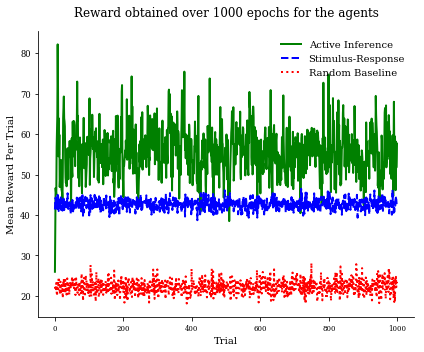

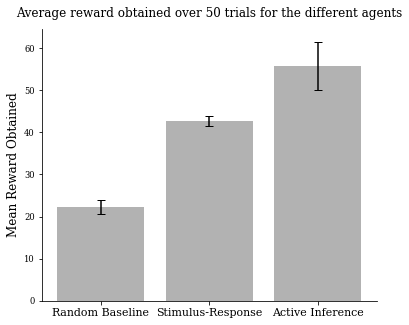

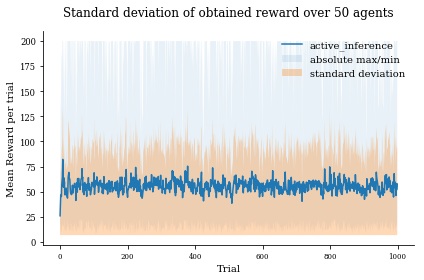

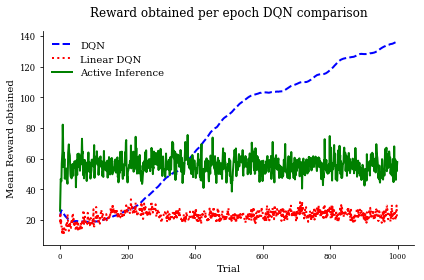

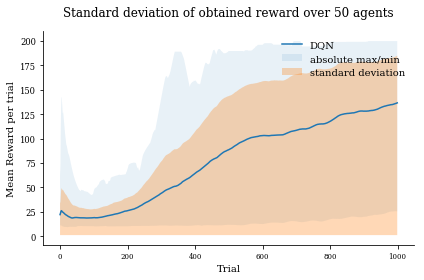

In [5]:
import seaborn as sn
# graphs
plt.rc("font", family="serif")
plt.rc("xtick", labelsize="x-small")
plt.rc("ytick", labelsize="small")
#plt.style.use(['fivethirtyeight'])



# comparison graph
fig = plt.figure(figsize=(6,5))
plt.plot(ai_means, color="g", label="Active Inference", ls='-',linewidth=2)
plt.plot(sr_means,color="b", label="Stimulus-Response", ls='--',linewidth=2)
plt.plot(random_means, color="r", label="Random Baseline", ls=':',linewidth=2)
plt.xlabel("Trial", fontsize=10)
plt.ylabel("Mean Reward Per Trial", fontsize=10)
plt.title("Reward obtained over 1000 epochs for the agents", fontsize=12, pad =15)
plt.legend(frameon=False, loc='upper right')
sn.despine(top=True, left=False, right=True, bottom=False)
plt.tight_layout()
plt.show()
fig.savefig("CartPole_results/proper_rewards_plot.pdf", format="pdf", dpi=5000)

# bar charts
fig = plt.figure(figsize=(6,5))
means = [np.mean(random_means), np.mean(sr_means), np.mean(ai_means)]
stds = [np.std(random_means), np.std(sr_means), np.std(ai_means)]
labels=['Random Baseline', 'Stimulus-Response', 'Active Inference']
x = [1,2,3]
plt.bar(x,means, color='k', yerr=stds, alpha=0.3,capsize=4,linewidth=2)
plt.xticks(x,labels,fontsize=11)
#plt.xlabel('Agent',fontsize=10)
plt.ylabel('Mean Reward Obtained',fontsize=12)
plt.title("Average reward obtained over 50 trials for the different agents",fontsize=12,pad=12)
sn.despine(top=True, left=False, right=True, bottom=False)
#plt.legend()
plt.show()
fig.savefig("CartPole_results/proper_agent_barchart.pdf", format="pdf", dpi=500)

# variation plot for active inference
fig, ax = plt.subplots(1)
maxs =np.max(active_inference, axis=0)
mins = np.min(active_inference,axis=0)
stds = np.std(active_inference,axis=0)
xs = range(1000)
ax.plot(xs, ai_means,label="active_inference")
plt.ylabel("Mean Reward per trial",fontsize=10)
plt.xlabel("Trial",fontsize=10)
plt.title("Standard deviation of obtained reward over 50 agents",fontsize=12, pad=15)
ax.fill_between(xs,maxs, mins,alpha=0.1, label="absolute max/min")
ax.fill_between(xs, ai_means + stds, np.min(ai_means -stds,0),alpha =0.3,label="standard deviation")
sn.despine(top=True, left=False, right=True, bottom=False)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()
fig.savefig("CartPole_results/variation_active_inference.pdf", format="pdf", dpi=500)

# comparison plot against DQN agents
fig, ax = plt.subplots(1)
xs = range(1000)
ax.plot(xs, dqn_means, label="DQN",color="b", ls="--", linewidth=2)
ax.plot(xs, linear_means, label="Linear DQN",color="r", ls=":", linewidth=2)
ax.plot(xs, ai_means,label="Active Inference",color="g", ls="-", linewidth=2)
plt.xlabel("Trial", fontsize=10)
plt.ylabel("Mean Reward obtained", fontsize=10)
plt.title("Reward obtained per epoch DQN comparison", fontsize=12, pad =15)
plt.legend(frameon=False, loc='upper right')
sn.despine(top=True, left=False, right=True, bottom=False)
plt.legend(frameon=False)
plt.tight_layout()
fig.savefig("CartPole_results/DQN_comparisons.pdf", format="pdf", dpi=500)

fig, ax = plt.subplots(1)
maxs =np.max(dqn, axis=0)
mins = np.min(dqn,axis=0)
stds = np.std(dqn,axis=0)
xs = range(1000)
ax.plot(xs, dqn_means,label="DQN")
plt.ylabel("Mean Reward per trial",fontsize=10)
plt.xlabel("Trial",fontsize=10)
plt.title("Standard deviation of obtained reward over 50 agents",fontsize=12, pad=15)
ax.fill_between(xs,maxs, mins,alpha=0.1, label="absolute max/min")
ax.fill_between(xs, dqn_means + stds, np.min(dqn_means -stds,0),alpha =0.3,label="standard deviation")
sn.despine(top=True, left=False, right=True, bottom=False)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()
fig.savefig("CartPole_results/DQN_variation.pdf", format="pdf", dpi=500)
